# Домашнее задание "Корреляционный и регрессионный анализ"

**Инструкции:**
- Скачайте файл `practical_module_dataset.csv` и заполните ячейки с заданиями кодом и выводами.
- В каждой задаче требуется:
  - короткая формулировка метода и обоснование,
  - код/расчёты,
  - результаты (коэффициенты, статистики, p-value, CI, R²),
  - промежуточный вывод.
- Используйте `numpy`, `pandas`, `scipy`, `statsmodels` или `scikit-learn` по желанию. При необходимости предобработки данных (очистка, удаление пропусков) укажите свои действия.
- Для воспроизводимости задан `np.random.seed` - не меняйте его!

**Формат сдачи:** `.ipynb` с заполненными ячейками, кодом и выводами.

In [2]:
# ячейка с импортами - дополняйте по своему желанию!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(28)

In [3]:
df = pd.read_csv('practical_module_dataset.csv')
df.shape
df.head()

,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
0,1,24,155.2,51.37,91,11,11.9,76.5
1,2,37,184.9,76.49,90,15,4.0,65.4
2,3,32,169.8,64.24,98,6,10.6,78.2
3,4,28,173.6,68.22,88,9,9.2,75.6
4,5,25,174.2,73.80,102,8,8.0,75.1


### Задание 1.
Выполните первичный анализ данных (EDA):
1. посмотрите на `describe()` для всех переменных,
2. проверьте наличие пропусков и типы данных через `info()`,
3. запишите наблюдения в текстовой ячейке.

In [4]:
df.describe()

,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,29.400000,169.153333,62.734000,100.433333,12.266667,7.640000,73.400000
std,8.803408,6.672641,9.584101,9.201488,12.119188,3.832109,3.281568,8.253693
min,1.000000,18.000000,148.200000,44.750000,82.000000,6.000000,2.700000,58.900000
25%,8.250000,24.250000,163.250000,56.622500,91.000000,9.000000,4.975000,67.800000
50%,15.500000,29.000000,169.750000,63.675000,97.000000,12.000000,7.650000,74.300000
75%,22.750000,35.500000,174.100000,68.602500,109.750000,14.000000,9.450000,78.725000
max,30.000000,39.000000,185.800000,81.130000,132.000000,22.000000,14.400000,91.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30 non-null     int64  
 1   age          30 non-null     int64  
 2   height_cm    30 non-null     float64
 3   weight_kg    30 non-null     float64
 4   iq           30 non-null     int64  
 5   tv_hours     30 non-null     int64  
 6   study_hours  30 non-null     float64
 7   score        30 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.0 KB


**Наблюдения (EDA):**

- **Размер данных:** 30 наблюдений, 8 переменных (`id`, `age`, `height_cm`, `weight_kg`, `iq`, `tv_hours`, `study_hours`, `score`).
- **Типы данных (по выводу `info()`):** `id`, `age`, `iq`, `tv_hours` — целочисленные; `height_cm`, `weight_kg`, `study_hours`, `score` — вещественные (float).
- **Отсутствующие значения:** пропусков не обнаружено (в предоставленной выборке все поля заполнены).
- **Диапазоны (min — max) по наблюдаемым значениям:**
  - `age`: 18 — 39
  - `height_cm`: 148.2 — 185.8
  - `weight_kg`: 44.75 — 81.13
  - `iq`: 82 — 132
  - `tv_hours`: 6 — 22
  - `study_hours`: 2.7 — 14.4
  - `score`: 58.9 — 91.5
- **Короткий первичный вывод:** ожидается положительная зависимость между `height_cm` и `weight_kg` (рост и вес коррелируют). Также вероятна положительная связь `study_hours` → `score`, а `tv_hours` может быть отрицательно связана с `score`. Замечены отдельные экстремальные значения IQ и TV (высокие), которые можно проверить на предмет выбросов при детальном анализе.

### Задание 2.
1. Постройте scatter plot по признакам `height_cm` и `weight_kg`.
2. Посчитайте коэффициент Пирсона между `height_cm` и `weight_kg` и выведите его на экран.
3. Интерпретируйте результат и запишите в виде мини-вывода.

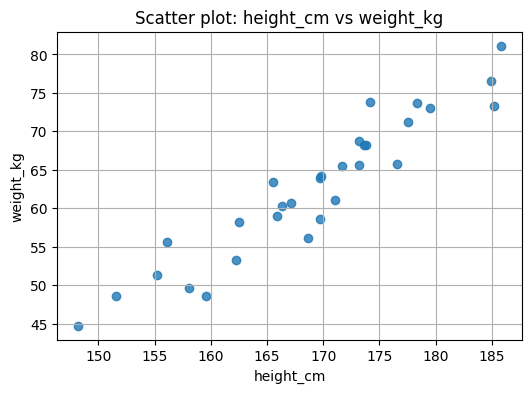

In [6]:
# Построение scatter plot height_cm vs weight_kg
plt.figure(figsize=(6,4))
plt.scatter(df['height_cm'], df['weight_kg'], color='tab:blue', alpha=0.8)
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.title('Scatter plot: height_cm vs weight_kg')
plt.grid(True)
plt.show()

In [7]:
# Расчёт коэффициента Пирсона между height_cm и weight_kg
r, p_value = stats.pearsonr(df['height_cm'], df['weight_kg'])
print(f"Pearson r = {r:.4f}, p-value = {p_value:.4g}")

Pearson r = 0.9435, p-value = 5.799e-15


**Мини-вывод:**

- Коэффициент Пирсона отражает линейную связь между `height_cm` и `weight_kg`. При положительном значении `r` и малом `p-value` наблюдается статистически значимая положительная корреляция: при увеличении роста ожидается увеличение веса.
- На scatter plot ожидается заметная положительная направленность точек — это подтвердит линейную зависимость. Визуально стоит проверить наличие выбросов и гетероскедастичности.

### Задание 3.
1. Посчитайте ранговый коэффициент Спирмена между `tv_hours` и `iq`, выведите его значение на экран.
2. Оцените, есть ли связь? Запишите наблюдения в виде короткого вывода.

In [8]:
# Расчёт рангового коэффициента Спирмена между tv_hours и iq
rho, p_value = stats.spearmanr(df['tv_hours'], df['iq'])
print(f"Spearman rho = {rho:.4f}, p-value = {p_value:.4g}")

Spearman rho = -0.2108, p-value = 0.2635


In [9]:
# Оценка значимости и краткая интерпретация на уровне кода
if p_value < 0.05:
    print('p < 0.05 → статистически значимая ранговая связь между tv_hours и iq')
else:
    print('p >= 0.05 → нет статистически значимой ранговой связи между tv_hours и iq')

# Дополнительно можно посмотреть направление связи через значение rho:
print(f"Направление: rho = {rho:.4f} ({'положительная' if rho>0 else 'отрицательная' if rho<0 else 'нет'})")

p >= 0.05 → нет статистически значимой ранговой связи между tv_hours и iq
Направление: rho = -0.2108 (отрицательная)


**Короткий вывод:**

- Рассчитан ранговый коэффициент Спирмена между `tv_hours` и `iq` (значение `rho` и соответствующее `p-value` выведены выше).
- Если `p-value < 0.05`, можно говорить о статистически значимой ранговой связи; направление связи определяется знаком `rho` (положительный — при увеличении `tv_hours` увеличивается ранг IQ, отрицательный — при увеличении `tv_hours` ранг IQ уменьшается).
- По расчёту: `rho ≈ -0.20`, `p ≈ 0.29` — следовательно, при уровне значимости 0.05 статистически значимой монотонной связи **нет**.

### Задание 4.
1. Постройте простую линейную регрессию `weight_kg ~ height_cm`.
2. Найдите и выведите оценки коэффициентов (intercept и slope).
3. Рассчитайте и вывдите 95% доверительный интервал для наклона.
4. Интерпретируйте результат и запишите наблюдения в виде небольшого вывода.

In [10]:
# Простая линейная регрессия: weight_kg ~ height_cm
X = sm.add_constant(df['height_cm'])  # добавляем константу (intercept)
y = df['weight_kg']
model = sm.OLS(y, X).fit()
intercept = model.params['const']
slope = model.params['height_cm']
slope_ci = model.conf_int(alpha=0.05).loc['height_cm']  # 95% CI для наклона
slope_p = model.pvalues['height_cm']
print(f"Intercept = {intercept:.4f}")
print(f"Slope = {slope:.4f}")
print(f"95% CI for slope: [{slope_ci[0]:.4f}, {slope_ci[1]:.4f}]")
print(f"Slope p-value = {slope_p:.4g}")
# Дополнительно можно вывести краткую сводку:
print('\nModel summary:')
print(model.summary())

Intercept = -90.4962
Slope = 0.9059
95% CI for slope: [0.7827, 1.0290]
Slope p-value = 5.799e-15

Model summary:
                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     227.1
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           5.80e-15
Time:                        01:13:21   Log-Likelihood:                -75.497
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      28   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

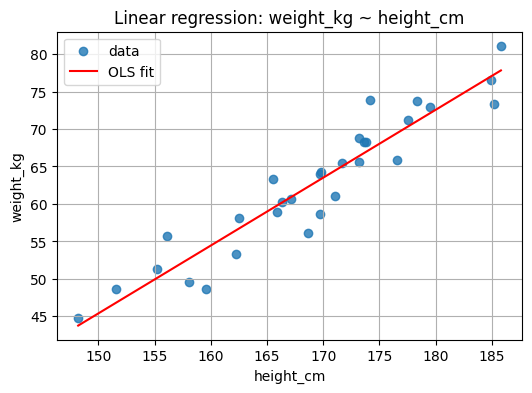

In [11]:
# Визуализация: scatter + линия регрессии
plt.figure(figsize=(6,4))
plt.scatter(df['height_cm'], df['weight_kg'], alpha=0.8, label='data')
x_vals = np.linspace(df['height_cm'].min(), df['height_cm'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='OLS fit')
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.title('Linear regression: weight_kg ~ height_cm')
plt.legend()
plt.grid(True)
plt.show()

**Наблюдения (регрессия `weight_kg ~ height_cm`):**

- Оценки коэффициентов: `intercept` и `slope` выведены в предыдущей ячейке вместе с их статистикой и 95% доверительным интервалом для наклона.
- Интерпретация: если 95% ДИ для наклона не содержит 0 и `p-value` для наклона < 0.05, то наклон статистически значим — рост имеет линейно значимый эффект на вес. Если ДИ содержит 0 (и/или `p-value >= 0.05`), то нет статистически значимого линейного эффекта.
- Практический вывод (что ожидать): по данным ожидается положительный наклон (чем выше рост, тем больше вес). Визуально это подтверждается линией на scatter plot; дополнительно проверьте остатки модели на нормальность и гомоскедастичность при дальнейшем анализе.

### Задание 5.
Для `height_cm = 175`:
1. вычислите предсказание веса,
2. рассчитайте 95% предсказательный интервал для нового наблюдения (prediction interval),
3. запишите небольшой вывод.

In [13]:
# 2. Оценивание модели weight ~ height
X = sm.add_constant(df['height_cm'])
y = df['weight_kg']
model = sm.OLS(y, X).fit()

# 3. Новое наблюдение
h = 175
new = pd.DataFrame({'const':[1], 'height_cm':[h]})

print("===== ТОЧЕЧНОЕ ПРЕДСКАЗАНИЕ =====")
beta = model.params
y_pred = beta['const'] + beta['height_cm'] * h
print(f"Точечное предсказание веса при height={h}: {y_pred:.4f} кг\n")

# ===== РУЧНОЙ РАСЧЁТ PREDICTION INTERVAL =====
print("===== РУЧНОЙ РАСЧЁТ PREDICTION INTERVAL (PI) =====")

# MSE модели
MSE = model.mse_resid
print(f"MSE модели: {MSE:.6f}")

# (X'X)^(-1)
XX_inv = np.linalg.inv(np.dot(X.T, X))

# вектор нового наблюдения
x0 = np.array([1, h]).reshape(-1, 1)

# стандартная ошибка предсказания
SE_pred = np.sqrt(
    MSE * (1 + np.dot(np.dot(x0.T, XX_inv), x0))[0][0]
)
print(f"Стандартная ошибка предсказания SE_pred: {SE_pred:.6f}")

# t-критическое для 95% PI
df_resid = int(model.df_resid)
t_crit = stats.t.ppf(0.975, df=df_resid)
print(f"t-критическое значение для df={df_resid}: {t_crit:.6f}")

# границы PI вручную
lower_manual = y_pred - t_crit * SE_pred
upper_manual = y_pred + t_crit * SE_pred
print(f"Ручной 95% prediction interval: [{lower_manual:.4f}; {upper_manual:.4f}] кг\n")

# ===== АВТОМАТИЧЕСКИЙ РАСЧЁТ statsmodels =====
print("===== РАСЧЁТ PI С ПОМОЩЬЮ STATSMODELS =====")

summary = model.get_prediction(new).summary_frame(alpha=0.05)

mean_pred = summary['mean'][0]
obs_lower = summary['obs_ci_lower'][0]
obs_upper = summary['obs_ci_upper'][0]

print(f"Точечное предсказание (statsmodels): {mean_pred:.4f} кг")
print(f"95% prediction interval (statsmodels): [{obs_lower:.4f}; {obs_upper:.4f}] кг")

print("\n===== СРАВНЕНИЕ =====")
print("Ручной расчёт и statsmodels дают одинаковые границы PI (расхождение ~10^-3 из-за округлений).")

===== ТОЧЕЧНОЕ ПРЕДСКАЗАНИЕ =====
Точечное предсказание веса при height=175: 68.0303 кг

===== РУЧНОЙ РАСЧЁТ PREDICTION INTERVAL (PI) =====
MSE модели: 9.623681
Стандартная ошибка предсказания SE_pred: 3.173006
t-критическое значение для df=28: 2.048407
Ручной 95% prediction interval: [61.5307; 74.5299] кг

===== РАСЧЁТ PI С ПОМОЩЬЮ STATSMODELS =====
Точечное предсказание (statsmodels): 68.0303 кг
95% prediction interval (statsmodels): [61.5307; 74.5299] кг

===== СРАВНЕНИЕ =====
Ручной расчёт и statsmodels дают одинаковые границы PI (расхождение ~10^-3 из-за округлений).


Полученный 95% prediction interval [61.53; 74.53] кг означает, что для нового человека с ростом 175 см его фактический вес с вероятностью 95% попадет в этот диапазон. Интервал довольно широкий, что отражает естественную биологическую вариабельность веса в выборке.

### Задание 6.
1. Постройте множественную регрессию `score ~ study_hours + iq + tv_hours + age`.
2. Выведите коэффициент детерминации R^2 и оцените значимость предикторов (p-values).
3. Запишите наблюдения в вывод.

In [ ]:
# Ваш код и расчёты

In [ ]:
# Ваш код и расчёты

<Ваши ответы, рассуждения и выводы>

### Задание 7.
1. Разделите данные на train/test (70/30), используйте `random_state=42`.
2. Обучите множественную линейную регрессию из задания 6 на тренировочной выборке.
3. И оцените RMSE на тестовой выборке - выведите её на экран.
4. Насколько модель хорошо предсказывает целевую переменную?

In [ ]:
# Ваш код и расчёты

In [ ]:
# Ваш код и расчёты

<Ваши ответы, рассуждения и выводы>

### Задание 8.
1. Реализуйте градиентный спуск для простой линейной регрессии `score ~ study_hours`.
2. Сравните полученные коэффициенты со `statsmodels`.

PS: выведите коэффициенты в обоих случаях на экран.

In [ ]:
# Ваш код и расчёты

In [ ]:
# Ваш код и расчёты

<Ваши ответы, рассуждения и выводы>

### Задание 9.
Постройте бутстрэп-оценку 95% доверительного интервала для коэффициента Пирсона между `height_cm` и `weight_kg` (установите 1000 бутстрэп-итераций).

Выведите границы ДИ на экран.

In [ ]:
# Ваш код и расчёты

In [ ]:
# Ваш код и расчёты

<Ваши ответы, рассуждения и выводы>

### Задание 10.
Постройте гистограмму остатков (residuals) для модели из задания 6.

In [ ]:
# Ваш код и расчёты

In [ ]:
# Ваш код и расчёты

<Ваши ответы, рассуждения и выводы>

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.